In [50]:
import pandas as pd

# Download dataset using pandas directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Save it locally with a custom name
df.to_csv("titanic_survival_prediction.csv", index=False)

# Load and display first 5 rows
df = pd.read_csv("titanic_survival_prediction.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Exploration and cleaning
We'll now understand the dataset what it contains, shich

In [2]:
# Dataset Shape
print("Shape of Dataset:",df.shape)

df.info()

Shape of Dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Summary
* 891 rows, 12 columns
* Age, Cabin and Embarked have missing values
* Some Columns are: int64 or float64 (numeric) or object (text or categorical)

In [3]:
#See column names
print("Columns:\n",df.columns)

df.describe()


Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Count of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Summary
* Cabin has too many null values
* Age and Embarked have some missing values
* All other columns are complete


#### 📌What should you check?
* Which columns have missing values?
* Are the categorical columns(e.g "Sex","Embarked")?
* What columns could be useful for prediction?


## Data Cleaning


In [ ]:
# Drop useless columns and the column with more missing values which don't help in prediction

df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [19]:
#Handle missing values
# Fill missing Age with median

df['Age']=df['Age'].fillna(df['Age'].median())

In [18]:
# Fill missing Embarked with mode

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
# Convert Categpries to numbers
# Conver Sex to (Male/Female --> 0/1)

df['Sex']=df['Sex'].map({'male':0,'female':1})

In [21]:
# Convert Embarked to (C,Q,S --> 0,1,2)

df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

In [23]:
# Final lean Check
# Check for any missing values
print(df.isnull().sum())

#Previes claned dataset
df.head(10)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
5,0,3,0,28.0,0,0,8.4583,1
6,0,1,0,54.0,0,0,51.8625,2
7,0,3,0,2.0,3,1,21.0750,2
8,1,3,1,27.0,0,2,11.1333,2
9,1,2,1,14.0,1,0,30.0708,0


## ML Model

In [25]:
# Define X and Y
# y --> is what we want to predict --> Survived
# x --> features (everything else)

X= df.drop('Survived',axis=1)
Y=df['Survived']

In [28]:
# we split into training and testing sets so we can check how well the model works.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

# test_size=0.2 means 20%data is for testing
# random_state=42 ensures we get the same split every time 

In [30]:
# Train the model ( Logistic Regression)
# What is Logistic Regression?
# Despite the name, it's used for classification, not regeression
# It answers Given the input (Age,sex,fare), what is probablity of surviving (0 or 1)

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

# .fit() meand train the model" using training data
# Internally, it finds the best coeffiecients for each column to predict survival

LogisticRegression(max_iter=1000)

In [32]:
# Evaluate the model
# Once trained, let's see how well it works by testing it

# Step 1: Make predictions
Y_pred=model.predict(X_test)

# Now Y_pred contains predictions like: [0,1,0,1,0,...]

In [35]:
# Step 2: Accuracy Score
# How many predictions were correct?

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:", accuracy)

# Accuracy = % of correct predictions
# If it's around 75-80%, that's a decent start

Accuracy: 0.8100558659217877


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_pred))

[[90 15]
 [19 55]]


* True Positives (TP): Predicted survived, actually survived
* True Negatives (TN): Predicted not survived, actually didn’t survive
* False Positives (FP): Predicted survived, actually didn’t
* False Negatives (FN): Predicted not survived, but they did



In [39]:
# Step 4 : Classification Report
# This gives precision, recall and f1-score for each class ( 0 annd 1)
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))
# Precision:Of all people predicted "survived", how many actually did?
# Recall:Of all actual survivors, how many were correctly predicted?
# F1-score:Balance between precision and recall

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Visualization

In [40]:
# Visualize the Dataset
# We'll use matlotlib and seaborn to create insightful plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme 
sns.set(style="whitegrid")

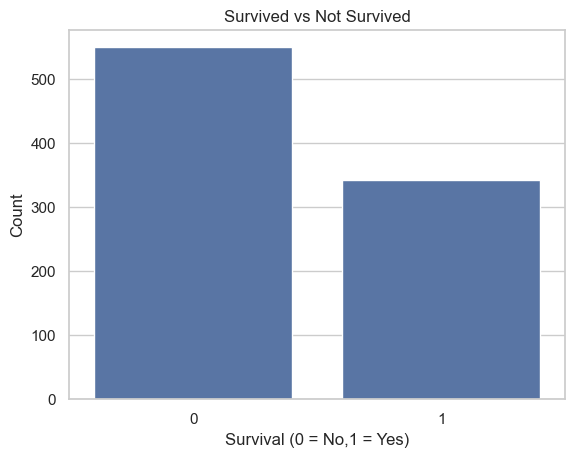

In [41]:
# Survived vs Not Survived (Count Plot)

sns.countplot(x='Survived',data=df)
plt.title('Survived vs Not Survived')
plt.xlabel('Survival (0 = No,1 = Yes)')
plt.ylabel('Count')
plt.show()

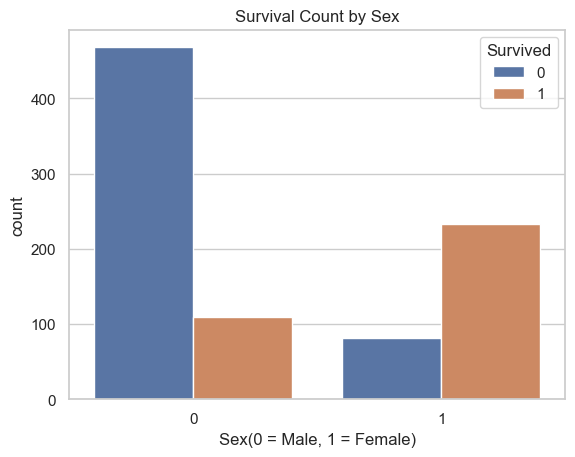

In [42]:
# Survival by Sex

sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex(0 = Male, 1 = Female)')
plt.legend(title='Survived')
plt.show()

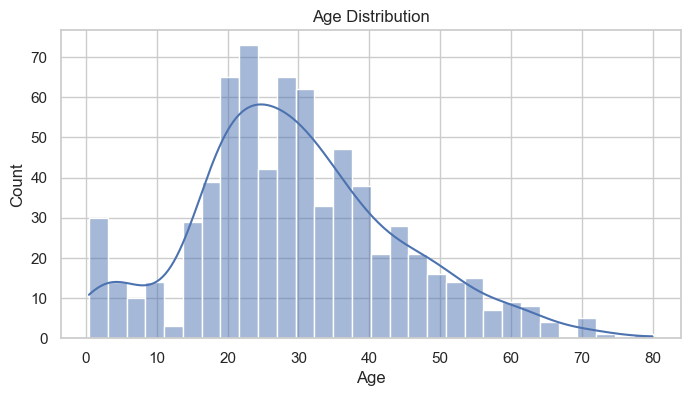

In [47]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

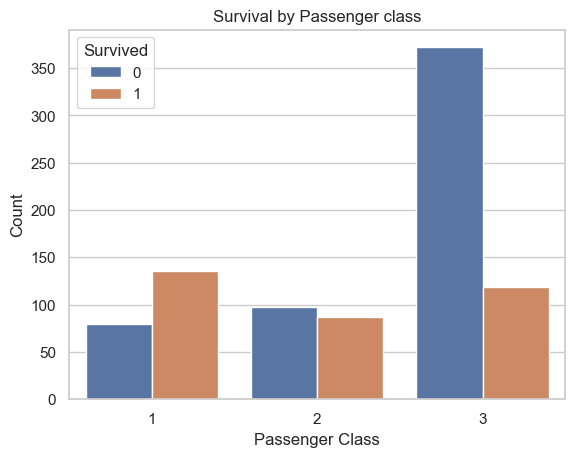

In [51]:
# Class Distribution vs Survival
# Which passenger class had highest survival?

sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survival by Passenger class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()